In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train=np.loadtxt('C:/Users/shyrii/lab4/ml-100k/u1.base')
test=np.loadtxt('C:/Users/shyrii/lab4/ml-100k/u1.test')
R=np.zeros((943,1682))
print(R.shape)
for sample in train:
    R[int(sample[0])-1][int(sample[1])-1]=int(sample[2])  
    
print(train.shape)

(943, 1682)
(80000, 4)


In [3]:
k = 10
max_epoch = 2000
learning_rate=0.02
penalty_factor=0.05

In [4]:
def loss(p,q,dataset):
    loss=0
    predict_rate=p@q
    for sample in dataset:
        i=int(sample[0])-1
        j=int(sample[1])-1
        r=int(sample[2])
        loss+=(r-predict_rate[i,j])**2+ penalty_factor/2*(sum((p[i]**2)+(q.T[j] ** 2)))
    return( loss/len(dataset) )       

In [5]:
p = np.ones((943,k))/2
q = np.ones((k,1682))/2
predict_rate=p@q
losses=[]
for i in range(max_epoch):
    index=np.random.choice(train.shape[0],1)[0]
    sample=train[index]  
    i=int(sample[0])-1
    j=int(sample[1])-1
    r=R[i,j]
    e=r-predict_rate[i,j]
    G_p=-2*e*q.T[j]+penalty_factor*p[i]
    p[i]=p[i]-learning_rate*G_p
    G_q=-2*e*p[i]+penalty_factor*q.T[j]
    q.T[j]=q.T[j]-learning_rate*G_q
    
    losses.append(loss(p,q,test))

Text(0.5, 1.0, 'The graph of absolute diff value varing with the number of iterations')

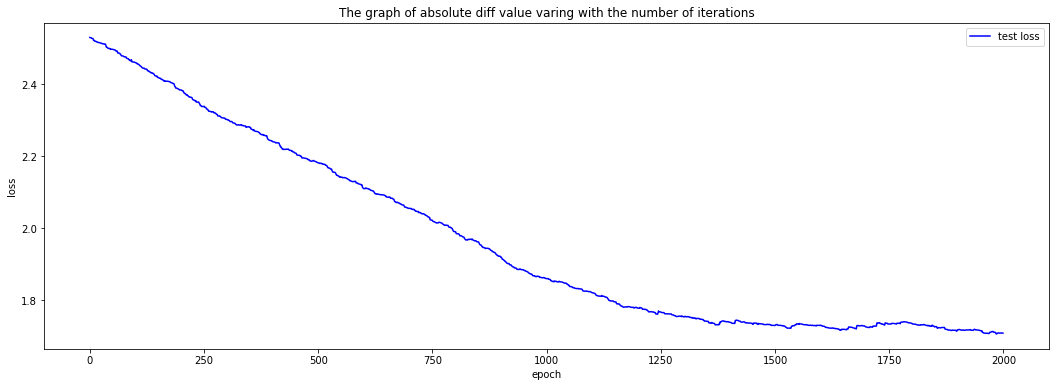

In [6]:
plt.figure(figsize=(18, 6))
plt.plot(losses, "-", color="b", label="test loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title("The graph of absolute diff value varing with the number of iterations")